# Project 3

This notebook follows the tutorial found here https://www.youtube.com/watch?v=sHWKN5dakPw

In [1]:
### Import Dependancies

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')

#### Import Data Set


In [46]:
whoURL = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
who_data = pd.read_csv(whoURL)

In [53]:
who_data.head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,1,1,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,1,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,1,0,0


In [48]:
cols = who_data.keys()
cols

Index(['Date_reported', ' Country_code', ' Country', ' WHO_region',
       ' New_cases', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],
      dtype='object')

In [49]:
# reconfigure the data so we have just cases
confirmed = who_data.filter(['Date_reported', ' New_cases'], axis = 1)
confirmed.set_index('Date_reported', inplace=True)
confirmed = confirmed.T
confirmed.head()

Date_reported,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,...,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06
New_cases,1,0,0,0,0,0,0,0,0,0,...,10,6,0,7,17,14,12,8,73,18


In [50]:
# reconfigure the data so we have just deaths
deaths = who_data.filter(['Date_reported', ' New_deaths'], axis = 1)
deaths.set_index('Date_reported', inplace=True)

deaths = deaths.T
deaths.head()

Date_reported,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,...,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06
New_deaths,0,0,0,0,0,0,0,0,0,0,...,1,0,-1,1,0,0,0,0,1,0


In [51]:
# sum by date
confirmed_df = confirmed.groupby(by=confirmed.columns, axis=1).sum()
deaths_df    = deaths.groupby(by=deaths.columns, axis=1).sum()

In [54]:
deaths_df

Date_reported,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07
New_deaths,1,0,0,0,0,0,1,0,1,1,...,4619,4155,3931,4184,4804,5044,5120,5187,4134,2841


In [55]:
dates = confirmed_df.keys()
dates

Index(['2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       ...
       '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
       '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07'],
      dtype='object', name='Date_reported', length=179)

In [57]:
world_cases = []
total_deaths = []
mortality_rate = []

for i in dates:
    confirmed_sum = confirmed_df[i].sum()
    death_sum     = deaths_df[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    

/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [58]:
total_deaths

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 3,
 8,
 8,
 16,
 15,
 24,
 26,
 26,
 38,
 43,
 46,
 46,
 57,
 64,
 66,
 73,
 73,
 86,
 89,
 97,
 108,
 97,
 255,
 13,
 144,
 142,
 106,
 98,
 138,
 118,
 120,
 113,
 101,
 164,
 83,
 61,
 43,
 59,
 68,
 45,
 87,
 79,
 90,
 102,
 112,
 92,
 237,
 207,
 265,
 335,
 340,
 445,
 346,
 756,
 585,
 830,
 947,
 1083,
 1375,
 1593,
 276,
 1784,
 2035,
 2123,
 2762,
 2476,
 3340,
 3485,
 3351,
 3612,
 4227,
 4981,
 5071,
 6870,
 5884,
 4944,
 5309,
 6909,
 6467,
 7485,
 6905,
 6197,
 5675,
 5398,
 6219,
 7924,
 12479,
 6514,
 7020,
 5145,
 5430,
 6836,
 6764,
 6421,
 5934,
 5907,
 5207,
 3787,
 5658,
 6134,
 6401,
 5702,
 8636,
 2876,
 2096,
 4106,
 6265,
 5402,
 6416,
 4625,
 4674,
 3518,
 4314,
 5000,
 5270,
 5241,
 4633,
 4536,
 2891,
 3572,
 4846,
 4474,
 5316,
 5061,
 3511,
 1075,
 3676,
 4354,
 4991,
 4865,
 4287,
 3759,
 3432,
 3622,
 4837,
 5086,
 5641,
 4582,
 3464,
 3536,
 3630,
 5329,
 4928,
 5050,
 4280,
 3923,
 3257,
 5498,
 5238,
 5163,

In [59]:
world_cases

[41,
 0,
 1,
 1,
 0,
 0,
 5,
 17,
 60,
 78,
 93,
 154,
 133,
 271,
 469,
 698,
 785,
 1789,
 1481,
 1760,
 2011,
 2115,
 2597,
 2832,
 3258,
 3914,
 3721,
 3202,
 3413,
 2670,
 3054,
 2486,
 2065,
 15213,
 4068,
 2732,
 2090,
 2161,
 1993,
 1856,
 486,
 1044,
 1109,
 1016,
 623,
 827,
 933,
 1373,
 1442,
 1832,
 1878,
 2329,
 2321,
 2210,
 2787,
 3855,
 3870,
 3897,
 4482,
 4453,
 6428,
 6826,
 10084,
 11768,
 12331,
 11229,
 15373,
 18980,
 24870,
 32294,
 25561,
 4390,
 33722,
 59957,
 30532,
 55727,
 41604,
 62791,
 61740,
 57692,
 58087,
 73694,
 73283,
 75205,
 80057,
 79829,
 76987,
 69341,
 74190,
 83271,
 85056,
 91074,
 84045,
 76022,
 71373,
 74320,
 75719,
 82277,
 84396,
 78150,
 69398,
 82669,
 72500,
 72579,
 80256,
 88606,
 84576,
 86636,
 73991,
 66289,
 72942,
 84868,
 90270,
 83738,
 85681,
 83206,
 70911,
 84140,
 88018,
 94669,
 88784,
 88301,
 81508,
 75820,
 82690,
 88663,
 92926,
 95567,
 103121,
 74753,
 90118,
 102270,
 90866,
 107530,
 104224,
 102458,
 88179,

In [ ]:
# MAKE ARRAYS FOR PREDICTIONS 

In [13]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases     = np.array(world_cases).reshape(-1, 1)
total_deaths    = np.array(total_deaths).reshape(-1, 1)

In [14]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [15]:
total_deaths


array([[    1],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    1],
       [    0],
       [    1],
       [    1],
       [    2],
       [    3],
       [    8],
       [    8],
       [   16],
       [   15],
       [   24],
       [   26],
       [   26],
       [   38],
       [   43],
       [   46],
       [   46],
       [   57],
       [   64],
       [   66],
       [   73],
       [   73],
       [   86],
       [   89],
       [   97],
       [  108],
       [   97],
       [  255],
       [   13],
       [  144],
       [  142],
       [  106],
       [   98],
       [  138],
       [  118],
       [  120],
       [  113],
       [  101],
       [  164],
       [   83],
       [   61],
       [   43],
       [   59],
       [   68],
       [   45],
       [   87],
       [   79],
       [   90],
       [  102],
       [  112],
       [   92],
       [  237],
       [  207],
       [  265],
       [  335],
       [  340],
       [

In [16]:
world_cases

array([[    41],
       [     0],
       [     1],
       [     1],
       [     0],
       [     0],
       [     5],
       [    17],
       [    60],
       [    78],
       [    93],
       [   154],
       [   133],
       [   271],
       [   469],
       [   698],
       [   785],
       [  1789],
       [  1481],
       [  1760],
       [  2011],
       [  2115],
       [  2597],
       [  2832],
       [  3258],
       [  3914],
       [  3721],
       [  3202],
       [  3413],
       [  2670],
       [  3054],
       [  2486],
       [  2065],
       [ 15213],
       [  4068],
       [  2732],
       [  2090],
       [  2161],
       [  1993],
       [  1856],
       [   486],
       [  1044],
       [  1109],
       [  1016],
       [   623],
       [   827],
       [   933],
       [  1373],
       [  1442],
       [  1832],
       [  1878],
       [  2329],
       [  2321],
       [  2210],
       [  2787],
       [  3855],
       [  3870],
       [  3897],
       [  4482

In [17]:
days_in_future  = 10  # WE WILL GO 10 DAYS INTO THE FUTURE
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates  = future_forecast[:-10]

In [18]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [19]:
#### Convert to date time values for easier viz

In [20]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime( '%m/%d/%Y'))

In [ ]:
##### TODO SOME VISUALIZATIONS HERE...

In [21]:
who_data.head()
who_data[' Country']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
26471       Zimbabwe
26472       Zimbabwe
26473       Zimbabwe
26474       Zimbabwe
26475       Zimbabwe
Name:  Country, Length: 26476, dtype: object

In [22]:
unique_countries = list(who_data[' Country'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Côte d’Ivoire',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Falkland Islands (Malvin

### Machine Learning

In [23]:


X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

In [24]:
#building SVM Model
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel':kernel, 'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv = 3, n_jobs=-1, return_train_score=True, n_iter=10, verbose =1)


In [25]:
len(X_train_confirmed)

151

In [26]:
len(y_train_confirmed)

151

In [27]:
X_train_confirmed

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [28]:
y_train_confirmed

array([[    41],
       [     0],
       [     1],
       [     1],
       [     0],
       [     0],
       [     5],
       [    17],
       [    60],
       [    78],
       [    93],
       [   154],
       [   133],
       [   271],
       [   469],
       [   698],
       [   785],
       [  1789],
       [  1481],
       [  1760],
       [  2011],
       [  2115],
       [  2597],
       [  2832],
       [  3258],
       [  3914],
       [  3721],
       [  3202],
       [  3413],
       [  2670],
       [  3054],
       [  2486],
       [  2065],
       [ 15213],
       [  4068],
       [  2732],
       [  2090],
       [  2161],
       [  1993],
       [  1856],
       [   486],
       [  1044],
       [  1109],
       [  1016],
       [   623],
       [   827],
       [   933],
       [  1373],
       [  1442],
       [  1832],
       [  1878],
       [  2329],
       [  2321],
       [  2210],
       [  2787],
       [  3855],
       [  3870],
       [  3897],
       [  4482

In [29]:
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [30]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 1, 'C': 0.01}

In [31]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [32]:
svm_confirmed

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [33]:
svm_pred

array([  1571.70540363,   1571.7494249 ,   1572.05757376,   1572.89397781,
         1574.52276464,   1577.20806186,   1581.21399705,   1586.8046978 ,
         1594.24429172,   1603.7969064 ,   1615.72666943,   1630.29770841,
         1647.77415093,   1668.42012459,   1692.49975698,   1720.2771757 ,
         1752.01650834,   1787.9818825 ,   1828.43742576,   1873.64726574,
         1923.87553001,   1979.38634618,   2040.44384184,   2107.31214458,
         2180.25538201,   2259.53768171,   2345.42317128,   2438.17597831,
         2538.06023041,   2645.34005516,   2760.27958016,   2883.14293299,
         3014.19424127,   3153.69763259,   3301.91723453,   3459.11717467,
         3625.56158066,   3801.51458005,   3987.24030045,   4183.00286944,
         4389.06641465,   4605.69506362,   4833.15294401,   5071.70418336,
         5321.61290928,   5583.14324937,   5856.55933124,   6142.12528248,
         6440.10523064,   6750.76330337,   7074.36362825,   7411.17033289,
         7761.44754483,  

Mean Absolute Error 38464.87460091136
Mean Squared Error 1742227339.921982


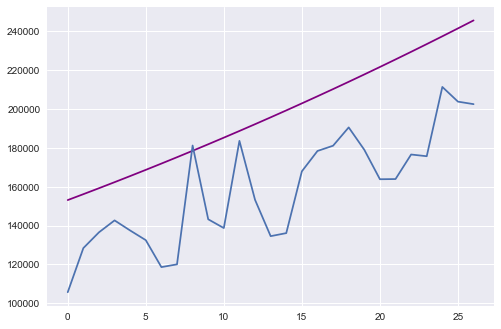

In [42]:
# Check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred, color='purple')
plt.plot(y_test_confirmed)

print ('Mean Absolute Error', mean_absolute_error(svm_test_pred, y_test_confirmed))
print ('Mean Squared Error',  mean_squared_error(svm_test_pred, y_test_confirmed))

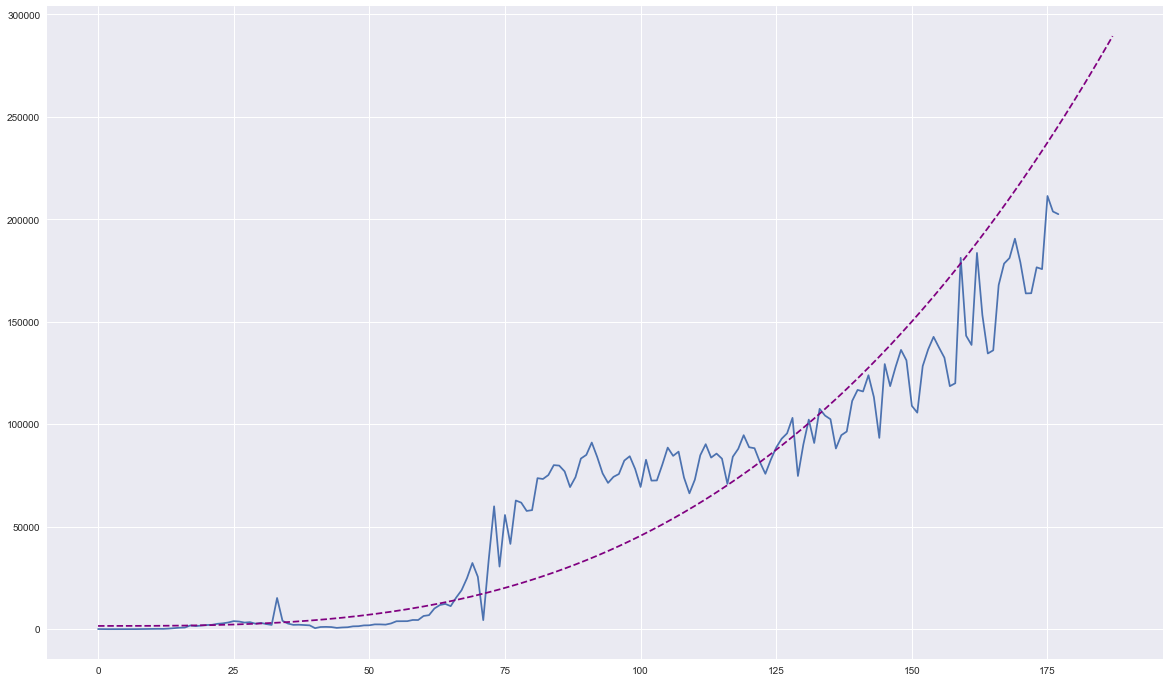

In [36]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')           

In [37]:
print("SVM FUTURE")
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM FUTURE


{('07/18/2020', 249840.72722492373),
 ('07/19/2020', 254048.58795873082),
 ('07/20/2020', 258303.72753078496),
 ('07/21/2020', 262606.41007185733),
 ('07/22/2020', 266956.89970693743),
 ('07/23/2020', 271355.46056354797),
 ('07/24/2020', 275802.3567701951),
 ('07/25/2020', 280297.85245630896),
 ('07/26/2020', 284842.2117434815),
 ('07/27/2020', 289435.69876620924)}

# Linear Regression model


In [38]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True, fit_intercept=True)

linear_model.fit(X_train_confirmed, y_train_confirmed)

test_linear_pred = linear_model.predict(X_test_confirmed)

linear_pred = linear_model.predict(future_forecast)

print ('Mean Absolute Error', mean_absolute_error(test_linear_pred, y_test_confirmed))
print ('Mean Squared Error',  mean_squared_error(test_linear_pred, y_test_confirmed))

Mean Absolute Error 30681.669590126923
Mean Squared Error 1361517042.5546904


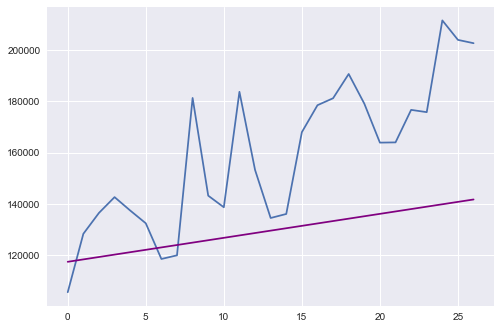

In [45]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred, color="purple")


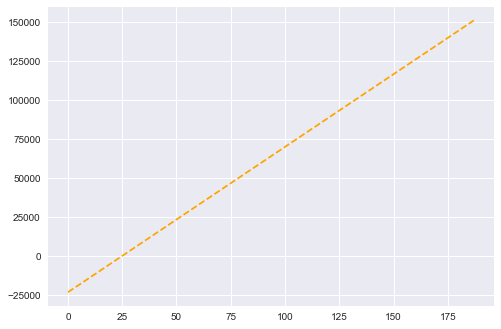

In [40]:
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')

In [41]:
#predictions for next 10 days
print('LINEAR REGRESSIONG PREDICTIONS')
print(linear_pred[-10:])

LINEAR REGRESSIONG PREDICTIONS
[[142678.62956431]
 [143611.19691879]
 [144543.76427327]
 [145476.33162774]
 [146408.89898222]
 [147341.4663367 ]
 [148274.03369118]
 [149206.60104566]
 [150139.16840014]
 [151071.73575462]]
